In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('df.csv')

In [2]:
df.columns

Index(['Unnamed: 0', 'prices.amountMax', 'prices.isSale',
       'prices.dateSeenYear', 'prices.dateSeenMonth', 'prices.dateSeenWeek',
       'prices.dateSeenDay', 'prices.dateSeenDayofweek',
       'prices.dateSeenDayofyear', 'prices.dateSeenIs_month_end',
       ...
       'colors_Multicolor', 'colors_Pink', 'colors_Red', 'colors_Silver',
       'colors_White', 'colors_nan_value', 'colors_other',
       'prices.currency_AUD', 'prices.currency_CAD', 'prices.currency_USD'],
      dtype='object', length=104)

In [3]:
df.drop(axis = 1, columns = 'Unnamed: 0', inplace = True)

In [4]:
df[:5]

,prices.amountMax,prices.isSale,prices.dateSeenYear,prices.dateSeenMonth,prices.dateSeenWeek,prices.dateSeenDay,prices.dateSeenDayofweek,prices.dateSeenDayofyear,prices.dateSeenIs_month_end,prices.dateSeenIs_month_start,...,colors_Multicolor,colors_Pink,colors_Red,colors_Silver,colors_White,colors_nan_value,colors_other,prices.currency_AUD,prices.currency_CAD,prices.currency_USD
0,89.00,False,2016,10,43,27,3,301,False,False,...,0,0,0,0,0,1,0,0,0,1
1,79.00,False,2016,10,40,5,2,279,False,False,...,0,0,0,1,0,0,0,0,0,1
2,31.99,True,2016,11,44,2,2,307,False,False,...,0,0,0,1,0,0,0,0,0,1
3,90.00,False,2016,10,43,25,1,299,False,False,...,0,0,0,0,0,1,0,0,0,1
4,35.99,True,2016,10,40,4,1,278,False,False,...,0,0,0,0,0,1,0,0,0,1


In [5]:
df.shape

(5560, 103)

### RFE

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [7]:
X = df.iloc[:, 1:]

In [8]:
y = df['prices.amountMax']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np

selectors = []

for idx in list(range(1, 103, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

In [11]:
wrapped_selectors = np.array(selectors)

In [12]:
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [13]:
from graph import trace_values, plot

In [14]:
trace = trace_values(x_values, y_values)
plot([trace])

* 76 features can get score .298, and 75 features can get score below 0.
* So 76 is the best feature number.

### RFECV

In [33]:
from sklearn.feature_selection import RFECV
estimator = LinearRegression(n_jobs=-1)
rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_train,y_train)

In [45]:
rfecv_scores = rfe.grid_scores_
rfecv_scores

array([ 3.40416720e-02,  4.55500273e-02,  4.85681930e-02,  4.96106191e-02,
        5.55415388e-02,  6.63004559e-02,  6.83525237e-02,  7.01772106e-02,
        7.78142690e-02,  7.85008684e-02,  7.89167716e-02,  7.89211221e-02,
        7.96325990e-02,  7.98103000e-02, -9.12861431e+20, -8.24578512e+20,
       -2.91740334e+17, -2.01100401e+19, -9.67049559e+18, -1.17459098e+18,
       -5.32689702e+15, -3.50615695e+18, -1.74412790e+19, -7.52869688e+18,
       -1.04553021e+18, -9.10700200e+21, -7.24794926e+19, -2.62433150e+19,
       -1.17660651e+20, -5.70284663e+20, -5.05145332e+22, -6.78537055e+22,
       -1.16917319e+23, -8.12340534e+20, -3.56812722e+22, -9.21682810e+21,
       -2.71166777e+20, -6.32313868e+21, -4.53139285e+22, -1.66335276e+23,
       -4.99347246e+22, -3.58518507e+22, -3.59895485e+22, -2.41223858e+23,
       -4.54276686e+23, -2.67412017e+23, -1.43023979e+22, -1.32340958e+22,
       -4.86359720e+23, -4.90215442e+23, -8.24414893e+23, -1.03066777e+24,
       -8.16334835e+21, -

In [42]:
num_features = list(range(0,102))[::1]

In [43]:
trace_rfecv = trace_values(num_features, rfecv_scores)
plot([trace_rfecv])

* 76 features can get score .298, and 75 features can get score below 0.
* So 76 is the best number.
* This result is almost the same as RFE model. But the it run much faster than the RFE.

### Coerce Target Variable and rerun the REV & RFECV

* Solution: Clip the outliers

In [46]:
lower, upper = np.percentile(y, [1,99]) # find middle 98% of prices
clipped = np.clip(y, upper, lower)

In [47]:
lower, upper

(4.99, 258.40999999999985)

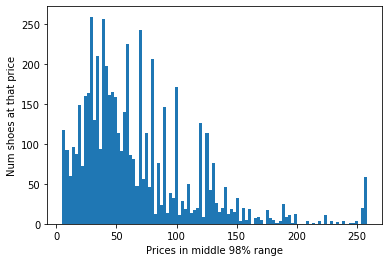

In [51]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.set_xlabel('Prices in middle 98% range')
ax.set_ylabel('Num shoes at that price')
ax.hist(clipped, bins=100)
plt.show()

In [54]:
df.shape

(5560, 103)

In [56]:
df[(lower < y) & (y < 250.0)].shape

(5404, 103)

In [58]:
df_1 = df[(lower < y) & (y < 250.0)]

In [59]:
df_1[:2]

,prices.amountMax,prices.isSale,prices.dateSeenYear,prices.dateSeenMonth,prices.dateSeenWeek,prices.dateSeenDay,prices.dateSeenDayofweek,prices.dateSeenDayofyear,prices.dateSeenIs_month_end,prices.dateSeenIs_month_start,...,colors_Multicolor,colors_Pink,colors_Red,colors_Silver,colors_White,colors_nan_value,colors_other,prices.currency_AUD,prices.currency_CAD,prices.currency_USD
0,89.0,False,2016,10,43,27,3,301,False,False,...,0,0,0,0,0,1,0,0,0,1
1,79.0,False,2016,10,40,5,2,279,False,False,...,0,0,0,1,0,0,0,0,0,1


In [85]:
df_1.to_csv('df_1.csv')

In [68]:
X = df_1.iloc[:, 1:]
y = df_1['prices.amountMax']

* RFE

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

In [70]:
selectors = []

for idx in list(range(1, 103, 1))[::-1]:
    # 1. create an estimator
    estimator = LinearRegression(n_jobs=-1)
    # 2. perform rfe with the idx number of features
    rfe = RFE(estimator, idx, step=1)
    # 3. reduce the dataset to the number of features
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    
    # 4. compute the accuracy score and append to the list
    estimator.fit(X_train_rfe,y_train)
    score = estimator.score(X_test_rfe,y_test)
    selectors.append(np.array([rfe, score, idx]))

In [71]:
wrapped_selectors = np.array(selectors)
y_values = wrapped_selectors[:, 1]
x_values = wrapped_selectors[:, -1]

In [72]:
trace = trace_values(x_values, y_values)
plot([trace])

* this time, the 81 features gets 0.413.

* RFECV

In [73]:
estimator = LinearRegression(n_jobs=-1)
rfe = RFECV(estimator, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_train,y_train)

In [74]:
rfecv_scores = rfe.grid_scores_

In [65]:
num_features = list(range(0,102))[::1]

In [75]:
trace_rfecv = trace_values(num_features, rfecv_scores)
plot([trace_rfecv])
# 82 features gets 0.44

* 82 features can get score 0.440.

### Rank the features

In [76]:
rfe = RFE(estimator, n_features_to_select=81)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1,
                               normalize=False),
    n_features_to_select=81, step=1, verbose=0)

In [77]:
selected_cols = X_train.columns[rfe.support_]

In [78]:
selected_cols

Index(['prices.isSale', 'prices.dateSeenYear', 'prices.dateSeenMonth',
       'prices.dateSeenWeek', 'prices.dateSeenIs_month_start', 'brand_Alfani',
       'brand_Asics', 'brand_Bearpaw', 'brand_Bloch', 'brand_Brinley Co.',
       'brand_Charles by Charles David', 'brand_Converse', 'brand_Crocs',
       'brand_Dansko', 'brand_Easy Spirit', 'brand_MICHAEL Michael Kors',
       'brand_New Balance', 'brand_Nike', 'brand_Nine West', 'brand_Nomad',
       'brand_Propet', 'brand_Telic', 'brand_Ugg', 'brand_Under Armour',
       'brand_VANS', 'manufacturer_Alfani', 'manufacturer_Bearpaw',
       'manufacturer_Bloch', 'manufacturer_Brinley Co',
       'manufacturer_Charles by Charles David', 'manufacturer_Converse',
       'manufacturer_Crocs', 'manufacturer_DANSKO', 'manufacturer_Dansko',
       'manufacturer_MICHAEL Michael Kors', 'manufacturer_New Balance',
       'manufacturer_Nike', 'manufacturer_Nine West', 'manufacturer_Nomad',
       'manufacturer_Novascarpa Group LLC', 'manufacturer_

In [2]:
import pandas as pd
df = pd.read_csv('df1.csv')

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.to_csv('df2.csv')

In [7]:
df.shape

(5357, 103)